# Exercise

Consider the problem of fitting a sphere $\{x \in \mathbb{R}^n : ||x-x_c|| = r\}$ to $m$ points $u_1, \dots, u_m \in\mathbb{R}^n$, by minimising the error function

$$
\sum_{i=1}^m \left(||x_c - u_i||_2^2-r^2\right)^2
$$

over the variables $x_c\in\mathbb{R}^n$ (the coordinates of the center of the sphere) and $r\in\mathbb{R}$ (the radius of the sphere).

This problem is not convex, however, it can be transformed in an LP by applying the method explained in **Section 2** of this paper:

https://ir.canterbury.ac.nz/bitstream/handle/10092/11104/coope_report_no69_1992.pdf

**Warning:** The paper uses a different notation than the one used within this exercise. In particular, the paper uses the symbols $a_j$ and $x$ to refer to the data point $u_i$ and the center $x_c$, respectively. 



Consider the problem instance given by the code below.

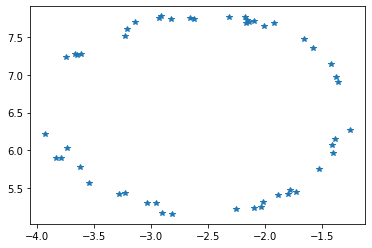

In [48]:
# Generation of the data points
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import math

n = 2 # plane
m = 50 # number of points
U = np.array([[-3.8355737e+00,5.9061250e+00],\
  [-3.2269177e+00,7.5112709e+00],\
  [-1.6572955e+00,7.4704730e+00],\
  [-2.8202585e+00,7.7378120e+00],\
  [-1.7831869e+00,5.4818448e+00],\
  [-2.1605783e+00,7.7231450e+00],\
  [-2.0960803e+00,7.7072529e+00],\
  [-1.3866295e+00,6.1452654e+00],\
  [-3.2077849e+00,7.6023307e+00],\
  [-2.0095986e+00,7.6382459e+00],\
  [-2.0965432e+00,5.2421510e+00],\
  [-2.8128775e+00,5.1622157e+00],\
  [-3.6501826e+00,7.2585500e+00],\
  [-2.1638414e+00,7.6899057e+00],\
  [-1.7274710e+00,5.4564872e+00],\
  [-1.5743230e+00,7.3510769e+00],\
  [-1.3761806e+00,6.9730981e+00],\
  [-1.3602495e+00,6.9056362e+00],\
  [-1.5257654e+00,5.7518622e+00],\
  [-1.9231176e+00,7.6775030e+00],\
  [-2.9296195e+00,7.7561481e+00],\
  [-3.2828270e+00,5.4188036e+00],\
  [-2.9078414e+00,5.1741322e+00],\
  [-3.5423007e+00,5.5660735e+00],\
  [-3.1388035e+00,7.7008514e+00],\
  [-1.7957226e+00,5.4273243e+00],\
  [-2.6267585e+00,7.7336173e+00],\
  [-3.6652627e+00,7.2686635e+00],\
  [-3.7394118e+00,6.0293335e+00],\
  [-3.7898021e+00,5.9057623e+00],\
  [-3.6200108e+00,5.7754097e+00],\
  [-3.0386294e+00,5.3028798e+00],\
  [-2.0320023e+00,5.2594588e+00],\
  [-2.9577808e+00,5.3040353e+00],\
  [-2.9146706e+00,7.7731243e+00],\
  [-3.2243786e+00,5.4402982e+00],\
  [-2.1781976e+00,7.7681141e+00],\
  [-2.2545150e+00,5.2233652e+00],\
  [-1.2559218e+00,6.2741755e+00],\
  [-1.8875105e+00,5.4133273e+00],\
  [-3.6122685e+00,7.2743342e+00],\
  [-2.6552417e+00,7.7564498e+00],\
  [-1.4127560e+00,6.0732284e+00],\
  [-3.7475311e+00,7.2351834e+00],\
  [-2.1367633e+00,7.6955709e+00],\
  [-3.9263527e+00,6.2241593e+00],\
  [-2.3118969e+00,7.7636052e+00],\
  [-1.4249518e+00,7.1457752e+00],\
  [-2.0196394e+00,5.3154475e+00],\
  [-1.4021445e+00,5.9675466e+00]]).T

plt.plot(U[0],U[1],'*')
plt.show()

Read **Section 2** of the paper (you do not need to read other parts of the paper) and 

1.   Find the optimal $x_c$ and $r$ using CVX.
2.   Plot the data points together with the found best circle.

In [80]:
r = cp.Variable()
xc = cp.Variable(2)

y = [xc[i] if i < n else cp.sum_squares(xc) - r**2 for i in range(n+1)]
y = cp.vstack(y)

B = np.array([[U[0,i],U[1,i],1] for i in range(m)])
d = np.linalg.norm(U, axis=0, keepdims=True)

objective = cp.Minimize(cp.quad_form(cp.norm(B @ y - d,2),2))
prob = cp.Problem(objective)

prob.solve()


Exception: ignored

In [74]:
y = np.ndarray(3)
y[0] = int(2*xc[0])
y[1] = 2*xc[1]


TypeError: ignored

In [72]:
y

array([3.5e-323, 4.0e-323, 4.4e-323])

In [69]:
xc[0]

Expression(AFFINE, UNKNOWN, ())